# Wine Quality Visualization

## Introduction:
* In the winemaking industry, the quality of wine is assessed through a series of physicochemical and sensory tests. Laboratory tests are often used to characterize wine from numerous aspects, while sensory tests are performed by human experts, relying on human senses. Human analysis can be a final test for the ultimate quality of a wine. Physicochemical and sensory analysis are complex and are still not fully understood, however, it may be reasonable to hypothesize that physicochemical properties have an impact on human judgment.

* Collected from May 2004 to February 2007, this dataset, winequality-red.csv, is related to the red variant of the Portuguese “Vinho Verde” wine. The dataset contains ten physicochemical properties of red wine: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol. It also contains a human determined rating for quality for each sample, on a scale from (0-10).
 
With this project, we will try to answer the question: “Is the quality of red wine affected by its physicochemical properties?”


## Methods:
* We plan on answering our predictive question using a k-nearest neighbors classification model. We aim to generate a random point in the plot and observe its nearest neighbors to predict the Grade of red wine. 
* We shall also standardize our variables to ensure fair comparison.


### Reading the Libraries into JupyterHub

We will first start by loading the libraries we will be using in this project.

In [2]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(gridExtra)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

### Loading Our Dataset into JupyterHub

Now that we have the libraries, we can start by loading our data into R and then adding a column using the mutate function to show the number of rows. We then use the select function to place our new column as the first column in the dataset.

In [3]:
dataset <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delim = ";") |>
           mutate(seq = seq(from = 1, to = 1599), na.rm = TRUE) |>
           select(13,1:12)
dataset

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


seq,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1597,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1598,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
1599,6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


### Wrangling

This data is very difficult to work with so we will start by first cleaning and wrangling our dataset. We begin by selecting the columns we want using the select function, then renaming the columns to provide better column names for each. 
Lastly, we are creating a categorical dataset below by adding a new column using the mutate function which tells us that:
* Quality < 5 is Low
* Quality of 5 is Average
* Quality of 6 is High
* Quality of > 6 is Very High

We will use as_factor() to make it a categorical variable.

In [4]:
filtered_dataset <- dataset |>
                    select("seq", "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
                           "chlorides", "free sulfur dioxide","total sulfur dioxide", "density", "pH", "sulphates",
                           "alcohol", "quality")
                           
                         
colnames(filtered_dataset) <- (c("seq", "fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar",
                           "chlorides", "free_sulfur_dioxide","total_sulfur_dioxide", "density", "pH", "sulphates",
                           "alcohol", "quality"))




categorical_dataset <- filtered_dataset |>
                       mutate(Grade = case_when(quality < 5 ~ "Low",
                                                quality == 5 ~ "Average", 
                                                quality == 6 ~ "High",
                                                quality > 6 ~ "Very High")) |>
                       mutate(Grade = as_factor(Grade)) |>
                        arrange(quality) 

categorical_dataset
                                               





seq,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Grade
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
460,11.6,0.580,0.66,2.20,0.074,10,47,1.0008,3.25,0.57,9.0,3,Low
518,10.4,0.610,0.49,2.10,0.200,5,16,0.9994,3.16,0.63,8.4,3,Low
691,7.4,1.185,0.00,4.25,0.097,5,14,0.9966,3.63,0.54,10.7,3,Low
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1404,7.2,0.33,0.33,1.7,0.061,3,13,0.99600,3.23,1.10,10.0,8,Very High
1450,7.2,0.38,0.31,2.0,0.056,15,29,0.99472,3.23,0.76,11.3,8,Very High
1550,7.4,0.36,0.30,1.8,0.074,17,24,0.99419,3.24,0.70,11.4,8,Very High


Table 1: Wine Dataset

## GGPairs

In order to find the correlation between our variables and the quality of wine, we will use the GGpairs function below:

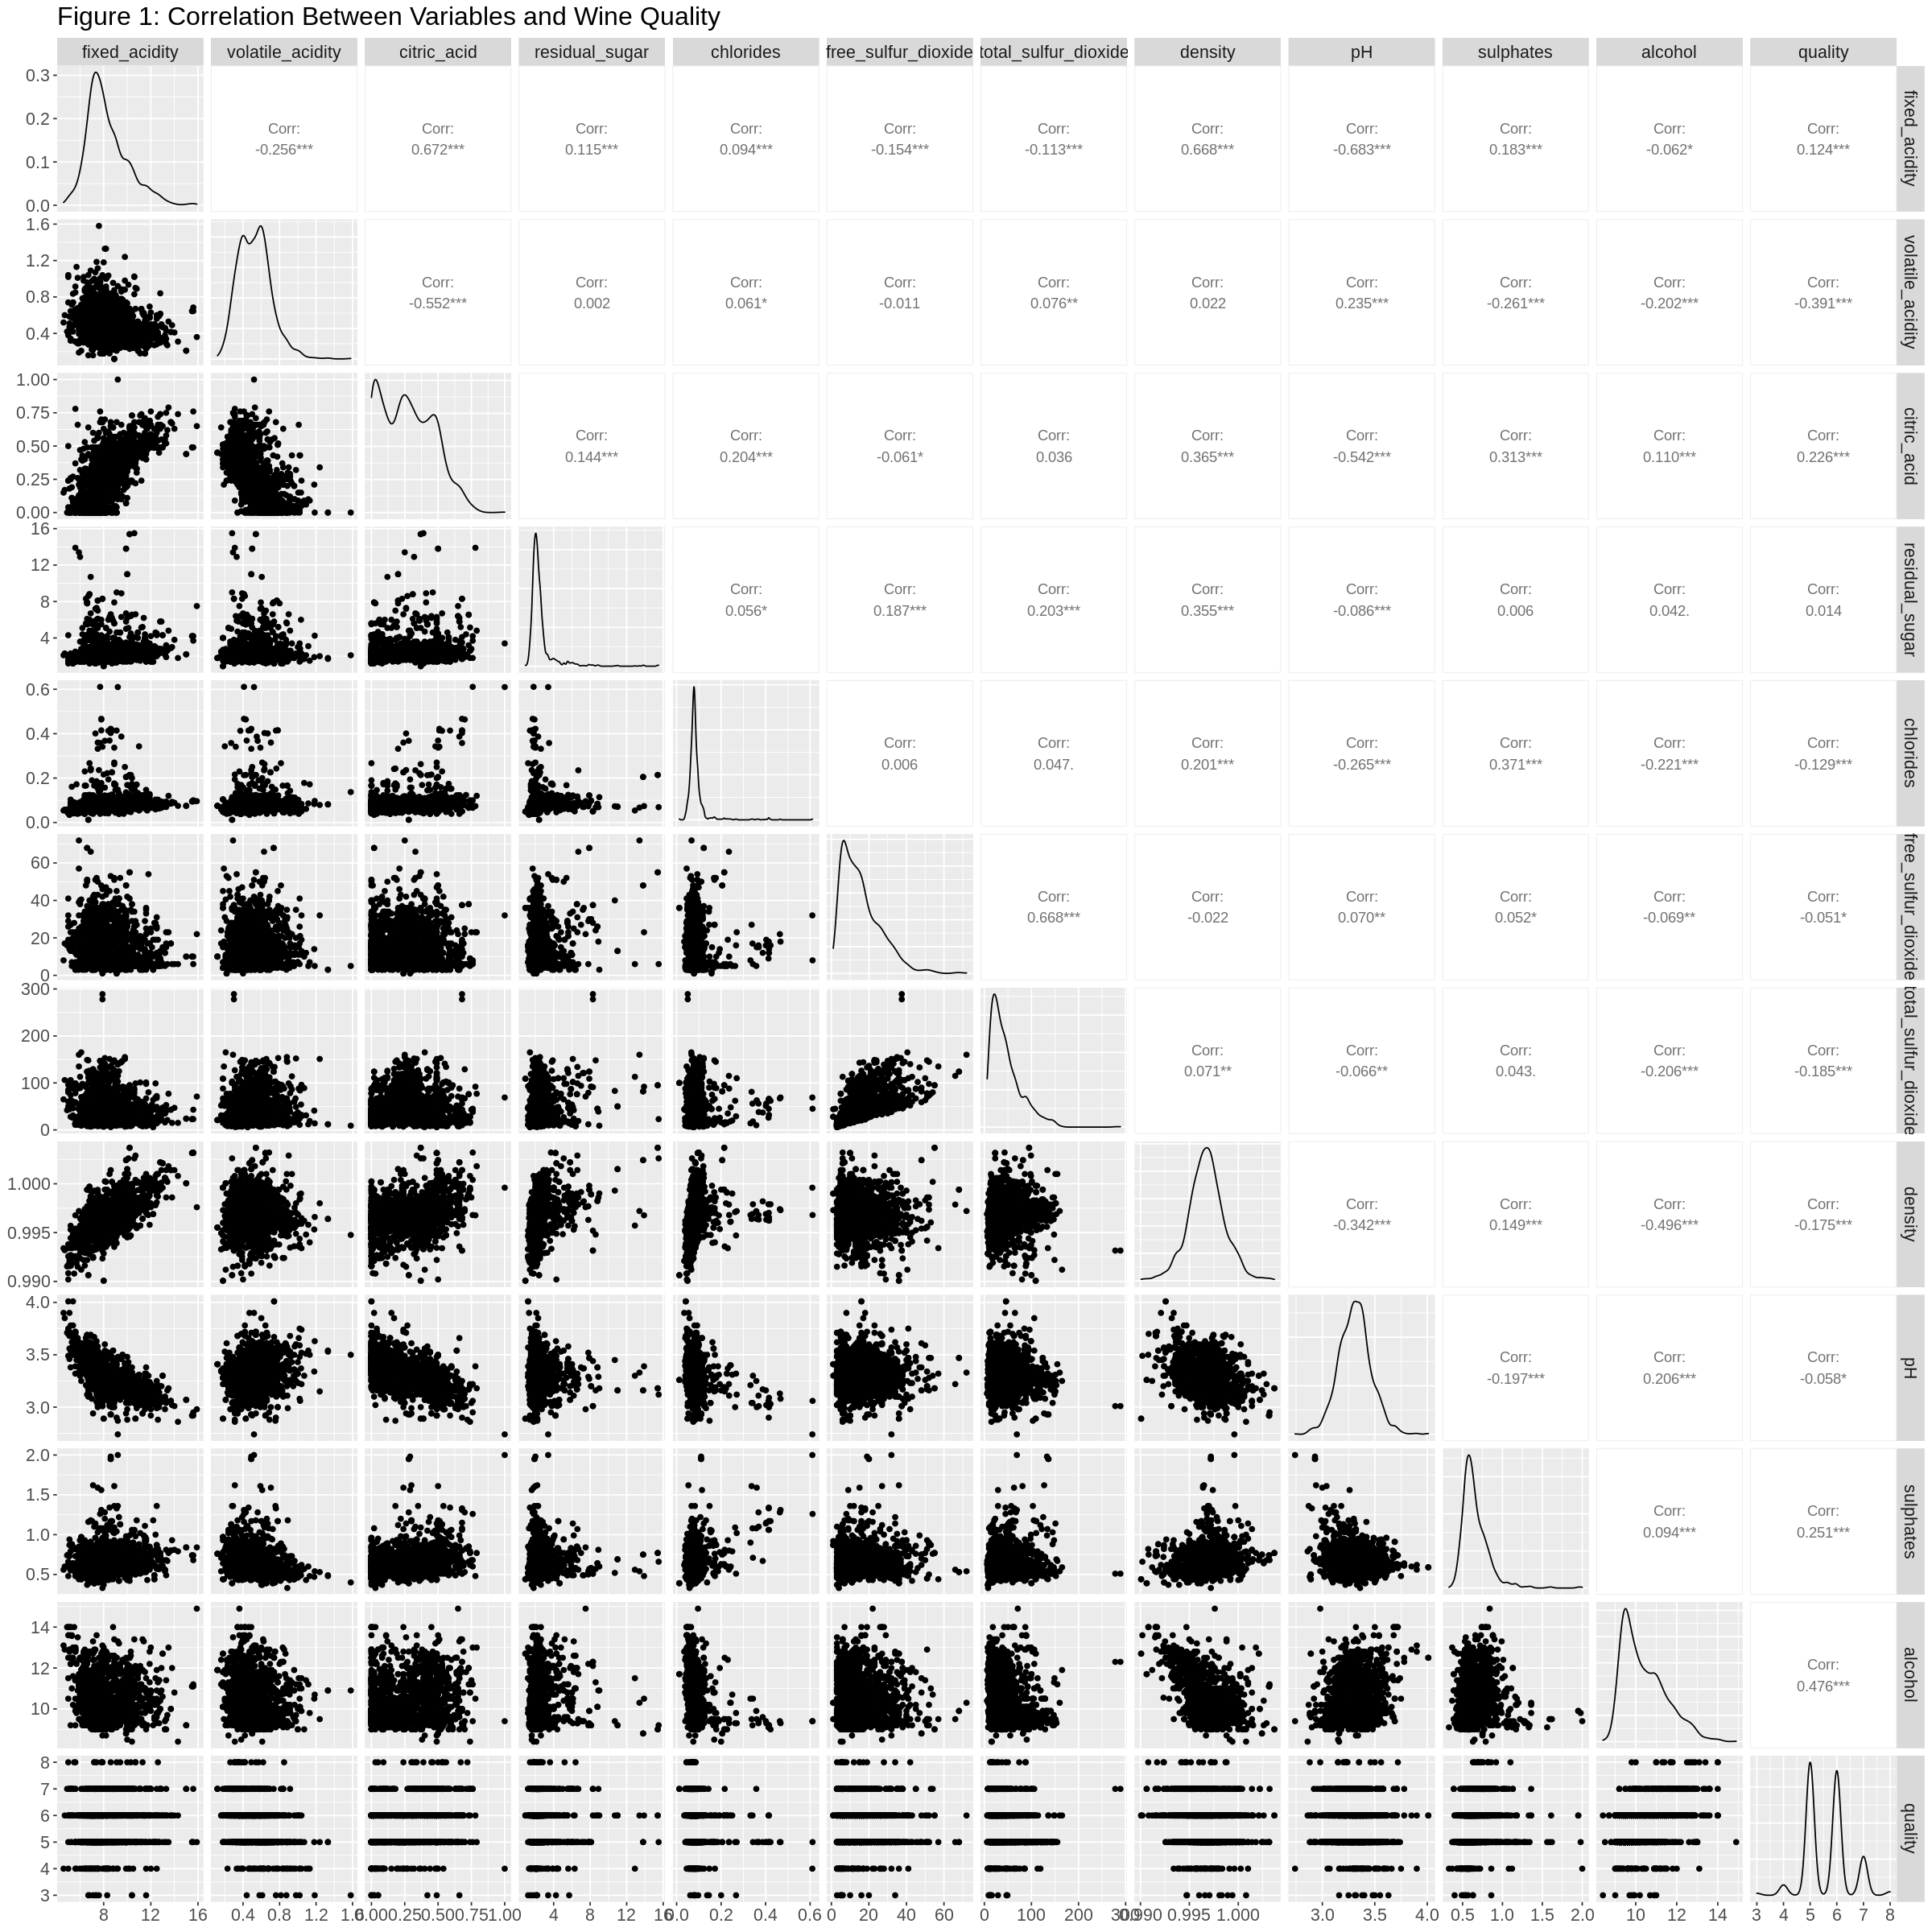

In [5]:
set.seed(1000)
options(repr.plot.width = 20, repr.plot.height = 20)

ggpairs <- ggpairs(categorical_dataset, columns = 2:13) + ggtitle("Figure 1: Correlation Between Variables and Wine Quality")+  
theme(text = element_text(size = 16)) 
ggpairs

In Figure 1 above, we can see that the variables with the largest correlaton to quality are volatile acidity and alcohol. However, we also need to check based on the p-value with the Pearson’s correlation test. 

For instance, the stars in the upper corner of the matrix indicate the significance. The more stars present, the more significant the relationship is. In order to be significant enough to the significance value (we use significance value (alpha) of 0.05), there needs to be at least one star present. 

In this p-value analysis, we are only interested in considering the p-values of the relationship between quality and each predictor variable. We can see that all variables have at least one star (meaning the p-value less than pre-determined alpha (i.e. 0.05)) with the exception of residual sugar. Therefore, we will omit residual.sugar as a variable in our analysis. 


In [6]:
Clean_wine_dataset <- categorical_dataset |>
                      select(-residual_sugar)
Clean_wine_dataset

seq,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Grade
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
460,11.6,0.580,0.66,0.074,10,47,1.0008,3.25,0.57,9.0,3,Low
518,10.4,0.610,0.49,0.200,5,16,0.9994,3.16,0.63,8.4,3,Low
691,7.4,1.185,0.00,0.097,5,14,0.9966,3.63,0.54,10.7,3,Low
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1404,7.2,0.33,0.33,0.061,3,13,0.99600,3.23,1.10,10.0,8,Very High
1450,7.2,0.38,0.31,0.056,15,29,0.99472,3.23,0.76,11.3,8,Very High
1550,7.4,0.36,0.30,0.074,17,24,0.99419,3.24,0.70,11.4,8,Very High


Table 2: Tidy Wine Dataset

## Boxplots

In order to further visualize our correlation, we will make box plots for each of the variables to help us see if there are trends between the variable and quality of wine. 

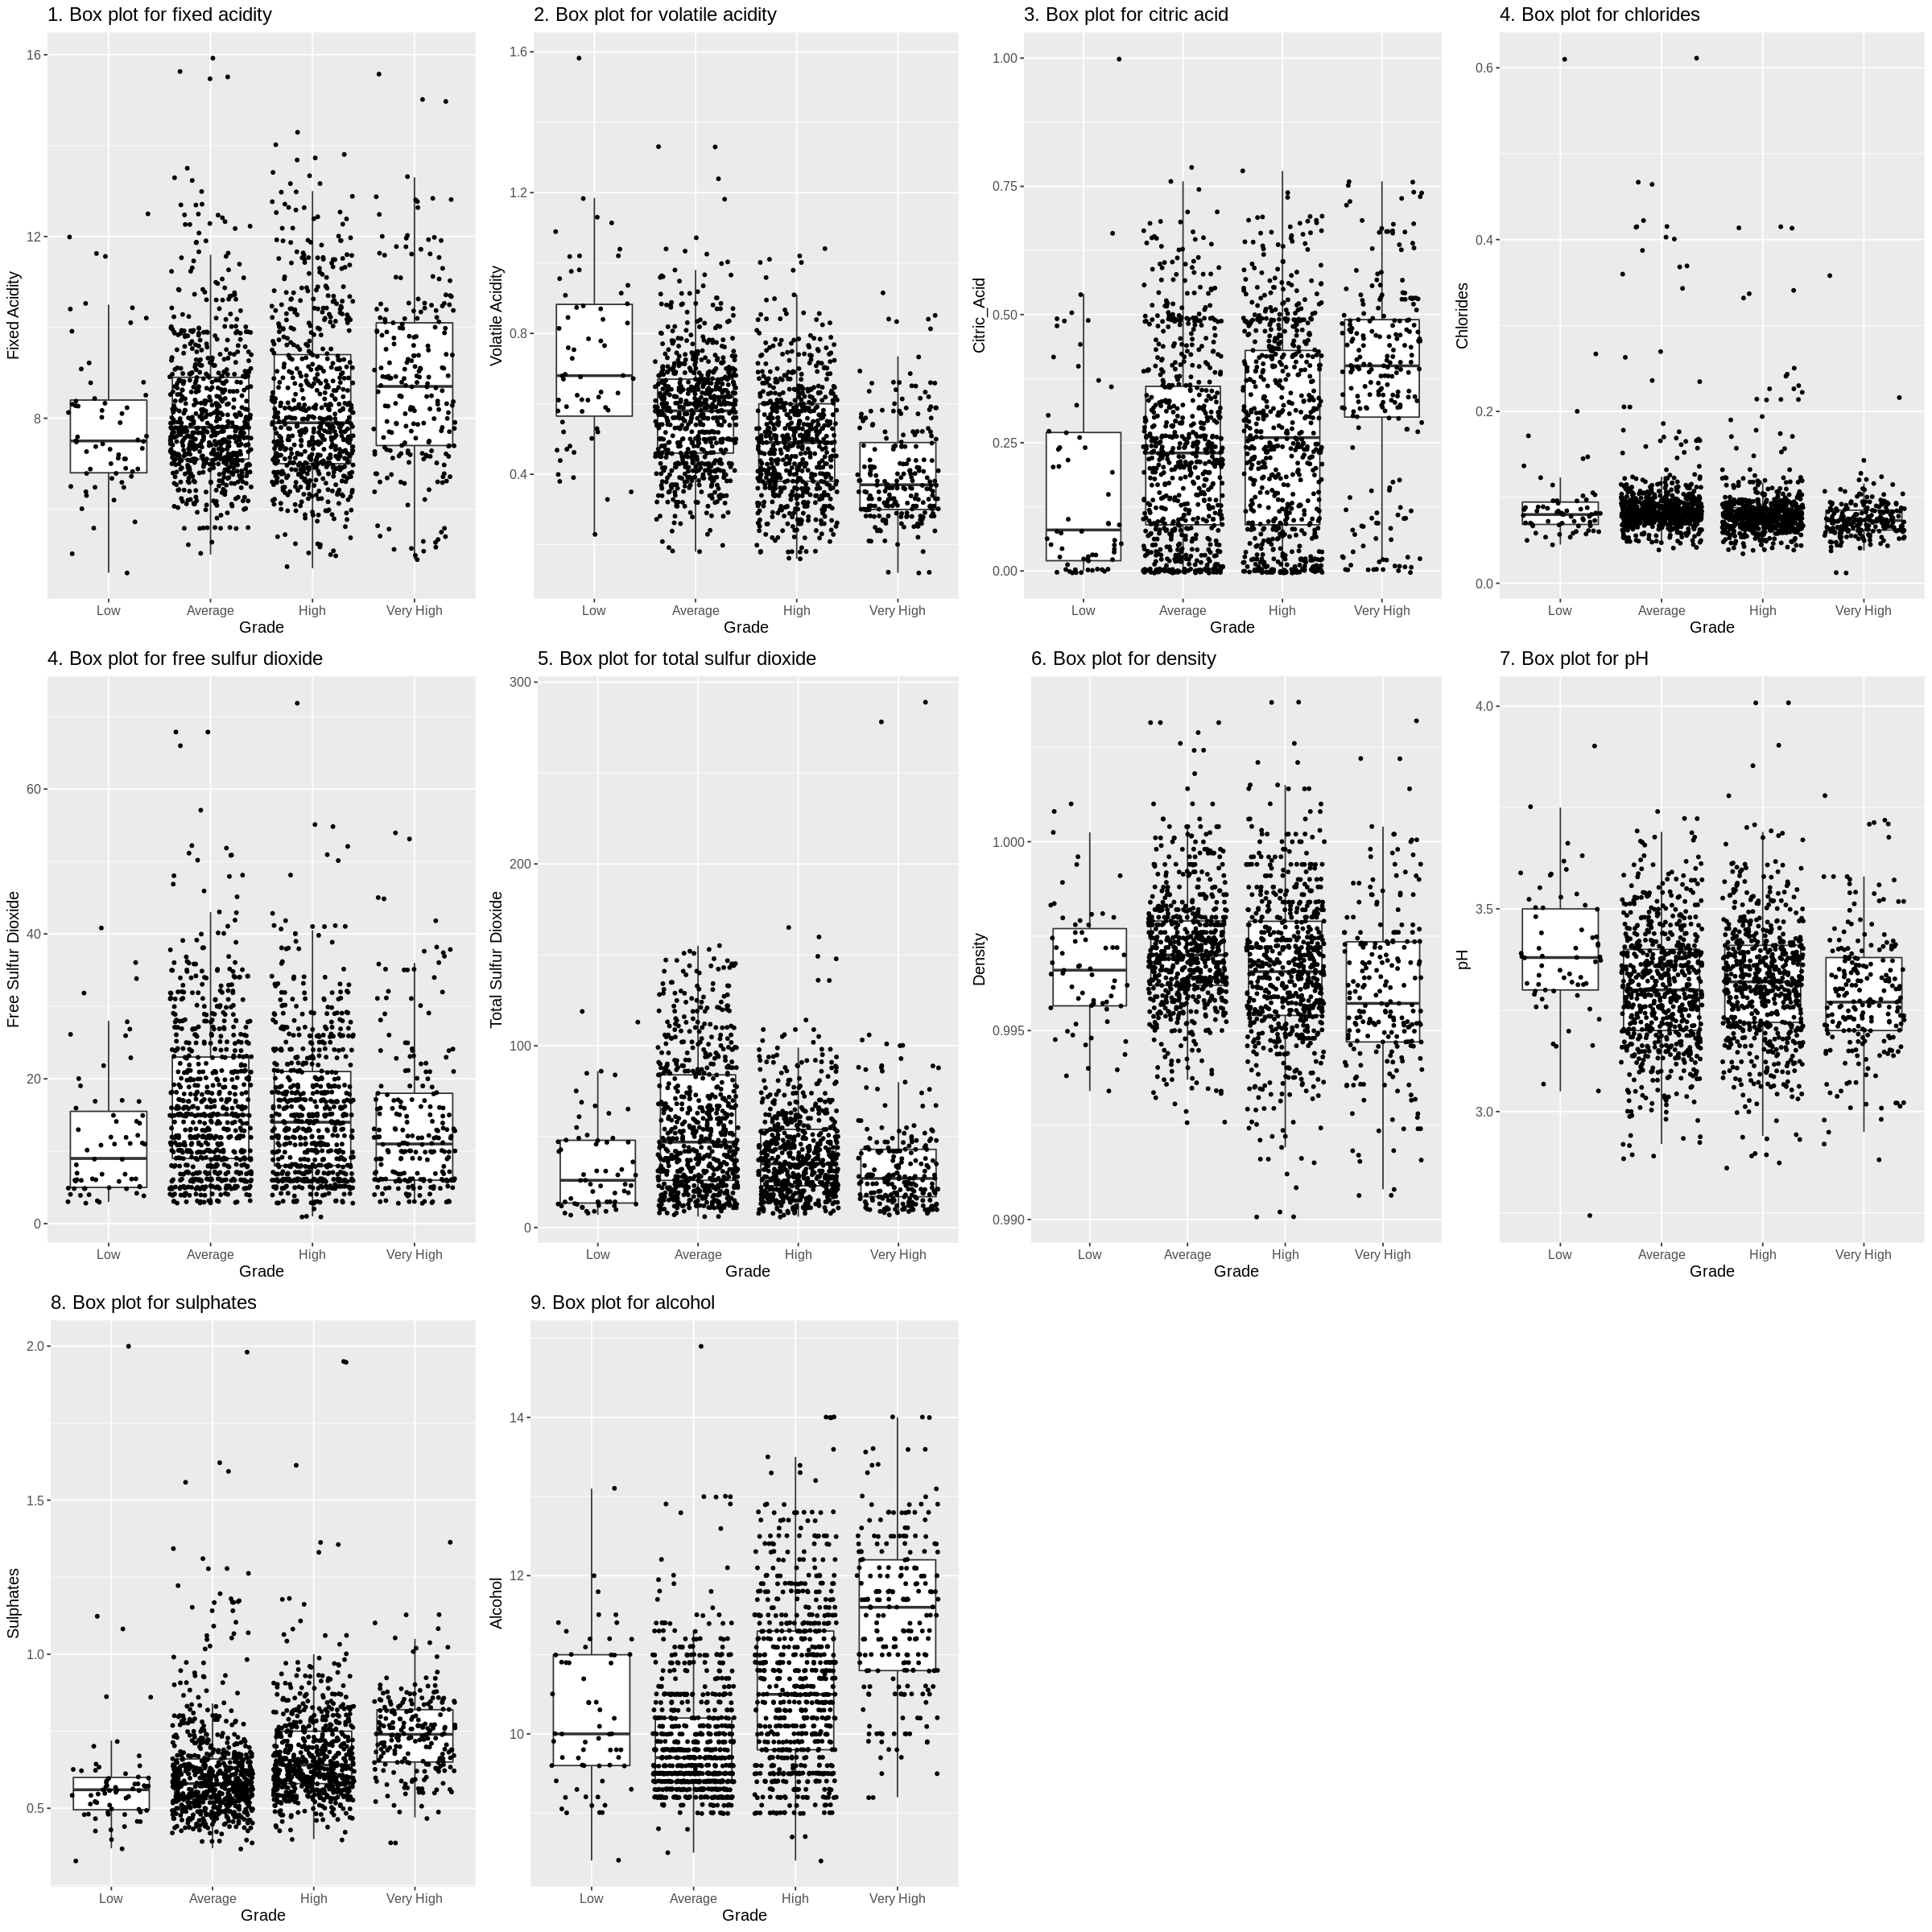

In [7]:
options(repr.plot.height = 20, repr.plot.width = 20)

# Arranging the boxplots from low to very high
clean_wine_dataset <- factor(Clean_wine_dataset$Grade , levels = c("Low", "Average", "High", "Very High"))

#boxplot for fixed acidity
boxplot_fixed_acidity <- Clean_wine_dataset |>
                         ggplot(aes(x = clean_wine_dataset, y = fixed_acidity)) +
                         geom_boxplot(outlier.shape = NA) +
                         geom_jitter(size = 1) +
                         labs(x = "Grade", y = "Fixed Acidity") +
                         theme(text = element_text(size = 12)) +
                         ggtitle("1. Box plot for fixed acidity")

#boxplot for volatile acidity
boxplot_volatile_acidity <- Clean_wine_dataset |>
                            ggplot(aes(x = clean_wine_dataset, y = volatile_acidity)) +
                            geom_boxplot(outlier.shape = NA) +
                            geom_jitter(size = 1) +
                            labs(x = "Grade", y = "Volatile Acidity") +
                            theme(text = element_text(size = 12)) +
                            ggtitle("2. Box plot for volatile acidity")


#boxplot for citric acid
boxplot_citric_acid <- Clean_wine_dataset |>
                       ggplot(aes(x = clean_wine_dataset, y = citric_acid)) +
                       geom_boxplot(outlier.shape = NA) +
                       geom_jitter(size = 1) +
                       labs(x = "Grade", y = "Citric_Acid") +
                       theme(text = element_text(size = 12)) +
                       ggtitle("3. Box plot for citric acid")

#boxplot for chlorides
boxplot_chlorides <- Clean_wine_dataset |>
                     ggplot(aes(x = clean_wine_dataset, y = chlorides)) +
                     geom_boxplot(outlier.shape = NA) +
                     geom_jitter(size = 1) +
                     labs(x = "Grade", y = "Chlorides") +
                     theme(text = element_text(size = 12)) +
                     ggtitle("4. Box plot for chlorides")

#boxplot for free sulfur dioxide
boxplot_free_sulfur_dioxide <- Clean_wine_dataset |>
                               ggplot(aes(x = clean_wine_dataset, y = free_sulfur_dioxide)) +
                               geom_boxplot(outlier.shape = NA) +
                               geom_jitter(size = 1) +
                               labs(x = "Grade", y = "Free Sulfur Dioxide") +
                               theme(text = element_text(size = 12)) +
                               ggtitle("4. Box plot for free sulfur dioxide")

                            

#boxplot for total sulfur dioxide
boxplot_total_sulfur_dioxide <- Clean_wine_dataset |>
                                ggplot(aes(x = clean_wine_dataset, y = total_sulfur_dioxide)) +
                                geom_boxplot(outlier.shape = NA) +
                                geom_jitter(size = 1) +
                                labs(x = "Grade", y = "Total Sulfur Dioxide") +
                                theme(text = element_text(size = 12)) +
                                ggtitle("5. Box plot for total sulfur dioxide")
 

#boxplot for density
boxplot_density <- Clean_wine_dataset |>
                   ggplot(aes(x = clean_wine_dataset, y = density)) +
                   geom_boxplot(outlier.shape = NA) +
                   geom_jitter(size = 1) +
                   labs(x = "Grade", y = "Density") +
                   theme(text = element_text(size = 12)) +
                   ggtitle("6. Box plot for density")

#boxplot for pH
boxplot_pH <- Clean_wine_dataset |>
              ggplot(aes(x = clean_wine_dataset, y = pH)) +
              geom_boxplot(outlier.shape = NA) +
              geom_jitter(size = 1) +
              labs(x = "Grade", y = "pH") +
              theme(text = element_text(size = 12)) +
              ggtitle("7. Box plot for pH")

#boxplot for sulphates
boxplot_sulphates <- Clean_wine_dataset |>
                     ggplot(aes(x = clean_wine_dataset, y = sulphates)) +
                     geom_boxplot(outlier.shape = NA) +
                     geom_jitter(size = 1) +
                     labs(x = "Grade", y = "Sulphates") +
                     theme(text = element_text(size = 12)) +
                     ggtitle("8. Box plot for sulphates")


#boxplot for alcohol
boxplot_alcohol <- Clean_wine_dataset |>
                   ggplot(aes(x = clean_wine_dataset, y = alcohol)) +
                   geom_boxplot(outlier.shape = NA) +
                   geom_jitter(size = 1) +
                   labs(x = "Grade", y = "Alcohol") +
                   theme(text = element_text(size = 12)) +
                   ggtitle("9. Box plot for alcohol")

#Let's arrange our boxplots so that it is easier to compare and find the ones with the most correlation
grid.arrange(boxplot_fixed_acidity,boxplot_volatile_acidity,boxplot_citric_acid,
             boxplot_chlorides,boxplot_free_sulfur_dioxide,boxplot_total_sulfur_dioxide,
             boxplot_density,boxplot_pH,boxplot_sulphates,boxplot_alcohol, ncol = 4)
                         

With the boxplots above, we can conclude that variables such as Citric Acid, Volatile Acid, Sulphates and Alcohol have correlation with Grade. However, the other variables have little to no correlaton with Grade.

### Removing The Outliers

With this data, our visualizations will be very clustered making it difficult to clearly see the correlation. Therefore, we will remove the outliers from out dataset as done below using the Inter Quantile function.

In [8]:
#find Q1, Q3, and interquartile range for values in column sulphates
Q1 <- quantile(Clean_wine_dataset$sulphates, .25)
Q3 <- quantile(Clean_wine_dataset$sulphates, .75)
IQR <- IQR(Clean_wine_dataset$sulphates)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
no_outliers <- subset(Clean_wine_dataset, Clean_wine_dataset$sulphates> (Q1 - 1.5*IQR) 
                      & Clean_wine_dataset$sulphates< (Q3 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers) 


#find Q4, Q6, and interquartile range for values in column citric_acid
Q4 <- quantile(no_outliers$citric_acid, .25)
Q6 <- quantile(no_outliers$citric_acid, .75)
IQR <- IQR(no_outliers$citric_acid)

#only keep rows in dataframe that have values within 1.5*IQR of Q4 and Q6
no_outliers_2 <- subset(no_outliers, no_outliers$citric_acid> (Q4 - 1.5*IQR) 
                      & no_outliers$citric_acid< (Q6 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers_2) 

#find Q7, Q9, and interquartile range for values in column volatile_acidity
Q7 <- quantile(no_outliers_2$volatile_acidity, .25)
Q9 <- quantile(no_outliers_2$volatile_acidity, .75)
IQR <- IQR(no_outliers_2$volatile_acidity)

#only keep rows in dataframe that have values within 1.5*IQR of Q7 and Q9
no_outliers_3 <- subset(no_outliers_2, no_outliers_2$volatile_acidity> (Q7 - 1.5*IQR) 
                     & no_outliers_2$volatile_acidity< (Q9 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers_3) 


#find Q11, Q13, and interquartile range for values in column alcohol
Q11 <- quantile(no_outliers_3$alcohol, .25)
Q13 <- quantile(no_outliers_3$alcohol, .75)
IQR <- IQR(no_outliers_3$alcohol)

#only keep rows in dataframe that have values within 1.5*IQR of Q11 and Q13
no_outliers_4 <- subset(no_outliers_3, no_outliers_3$alcohol> (Q11 - 1.5*IQR) 
                     & no_outliers_3$alcohol< (Q13 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers_4) 


no_outliers_updated <- no_outliers_4 |>
                   select(-quality)

no_outliers_updated
           


[1] 1540   13

[1] 1540   13

[1] 1520   13

[1] 1506   13

seq,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Grade
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
460,11.6,0.58,0.66,0.074,10,47,1.00080,3.25,0.57,9.0,Low
518,10.4,0.61,0.49,0.200,5,16,0.99940,3.16,0.63,8.4,Low
833,10.4,0.44,0.42,0.145,34,48,0.99832,3.38,0.86,9.9,Low
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1203,8.6,0.42,0.39,0.068,6,12,0.99516,3.35,0.69,11.7,Very High
1450,7.2,0.38,0.31,0.056,15,29,0.99472,3.23,0.76,11.3,Very High
1550,7.4,0.36,0.30,0.074,17,24,0.99419,3.24,0.70,11.4,Very High


Table 3: Outlier Removed Dataset

#### Splitting into Training and Testing Datasets

Our initial step is to set the seed for our data to be reproducible. In addition, we will use the inital_split function to split our clean data set into 75% for training data and 25% for our testing dataset. wine_train is our training data and wine_test is our testing data.

In [17]:
set.seed(1000)
wine_split <- initial_split(no_outliers_updated, prop = 0.75, strata = Grade)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)


#### Cross Validation

Next, we apply cross validation onto our training data and split it into 5 evenly distributed subsets. We then apply stratification to avoid an imbalance of our target variable in the subsets ultimately decreasing biased datasets.

In [18]:
wine_vfold <- vfold_cv(wine_train, v = 5, strata = Grade)

#### Creating the Classification Model

Now, let's create a classification model using these variables. We shall first create a model specification and set neighbors as tune() as we want to find the best number of neighbors that give the best accuracy estimate. After that, we shall create a recipe using  all predictors variables that has correlation towards Grade from the visualization above. We shall also step and center our data to standardize it.

In [19]:
wine_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

wine_recipe <- recipe(Grade ~ citric_acid + volatile_acidity + sulphates + alcohol, data = wine_train) |>
               step_scale(all_predictors()) |>
               step_center(all_predictors())

#### Finding the Best Neighbours

Next we use workflow to combine the recipe and model specification. Furthermore, we used tune_grid() as it fits the model for each value in a range of parameter values and we set the grid as 100 as we shall use 100 $K$ values for this model. We then aggregate the mean and standard error using the collect_metrics() function. We then filtered everything except the accuracy and arranged it from highest to lowest mean. Then, we sliced the top row and found which neighbour gives the best accuracy. In this case, 15 neighbours. 

In [20]:
wine_fit <- workflow() |>
            add_recipe(wine_recipe) |>
            add_model(wine_spec) |>
            tune_grid(resamples = wine_vfold, grid = 100) |>
            collect_metrics() |>
            filter(.metric == "accuracy") |>
            arrange(desc(mean)) |>
            slice(1) |>
            pull(neighbors)

wine_fit

[1] 15

#### Creating a New Model Specification

Now, we set the neighbours as 15 in our new model specification as determined from above and we shall create another recipe.

In [21]:
wine_spec_test <- nearest_neighbor(weight_func = "rectangular", neighbors = 15) |>
                  set_engine("kknn") |>
                  set_mode("classification")

wine_recipe_test <- recipe(Grade ~ alcohol + citric_acid + volatile_acidity + sulphates, data = wine_train) |>
                    step_scale(all_predictors()) |> 
                    step_center(all_predictors())

#### Utilizing Workflow and Fitting

We use workflow again to combine the new model specification and recipe and then we fitted our training data.

In [22]:
wine_fit_test <- workflow() |>
                 add_recipe(wine_recipe_test) |>
                 add_model(wine_spec_test) |>
                 fit(data = wine_train)

#### Predicting our Accuracy

Finally, we use our classification model to predict on our Grade on our testing data and we then bind the column of predictions to our original testing dataset. We then use metrics to compute the accuracy.

In [23]:
wine_predict <- wine_fit_test |>
                predict(wine_test) |>
                bind_cols(wine_test) |>
                metrics(truth = Grade, estimate = .pred_class)
wine_predict

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.6074271
kap,multiclass,0.3578178


Table 4: Accuracy Table

In [24]:
wine_accuracy <- wine_predict |>
                 filter(.metric == "accuracy") |>
                 pull(.estimate)
wine_accuracy

[1] 0.6074271

The accuracy of our predicted model was found to be 60%. Despite this number being lower than we initially had hoped, this result can be justified by understanding that the quality of wine is likely a multi-dimensional construct, with other factors that could very well be more significant than chemical composition (Charters & Pettigrew, 2007). Though connoisseurs are trained to taste wine, quality can be conceived in varying ways depending on personal preference and the dimensions on which they focus. Though our results show that a relationship does exist, which supports our original hypothesis, we still cannot expect the relationship between physicochemical properties and quality to have a strong significant correlation.


### Visualization       
For our data visualization, we can now use the 4 box plots of Citric Acid, Volatile Acid, Sulphates and Alcohol as we have seen that they have the most correlation with Grade. 

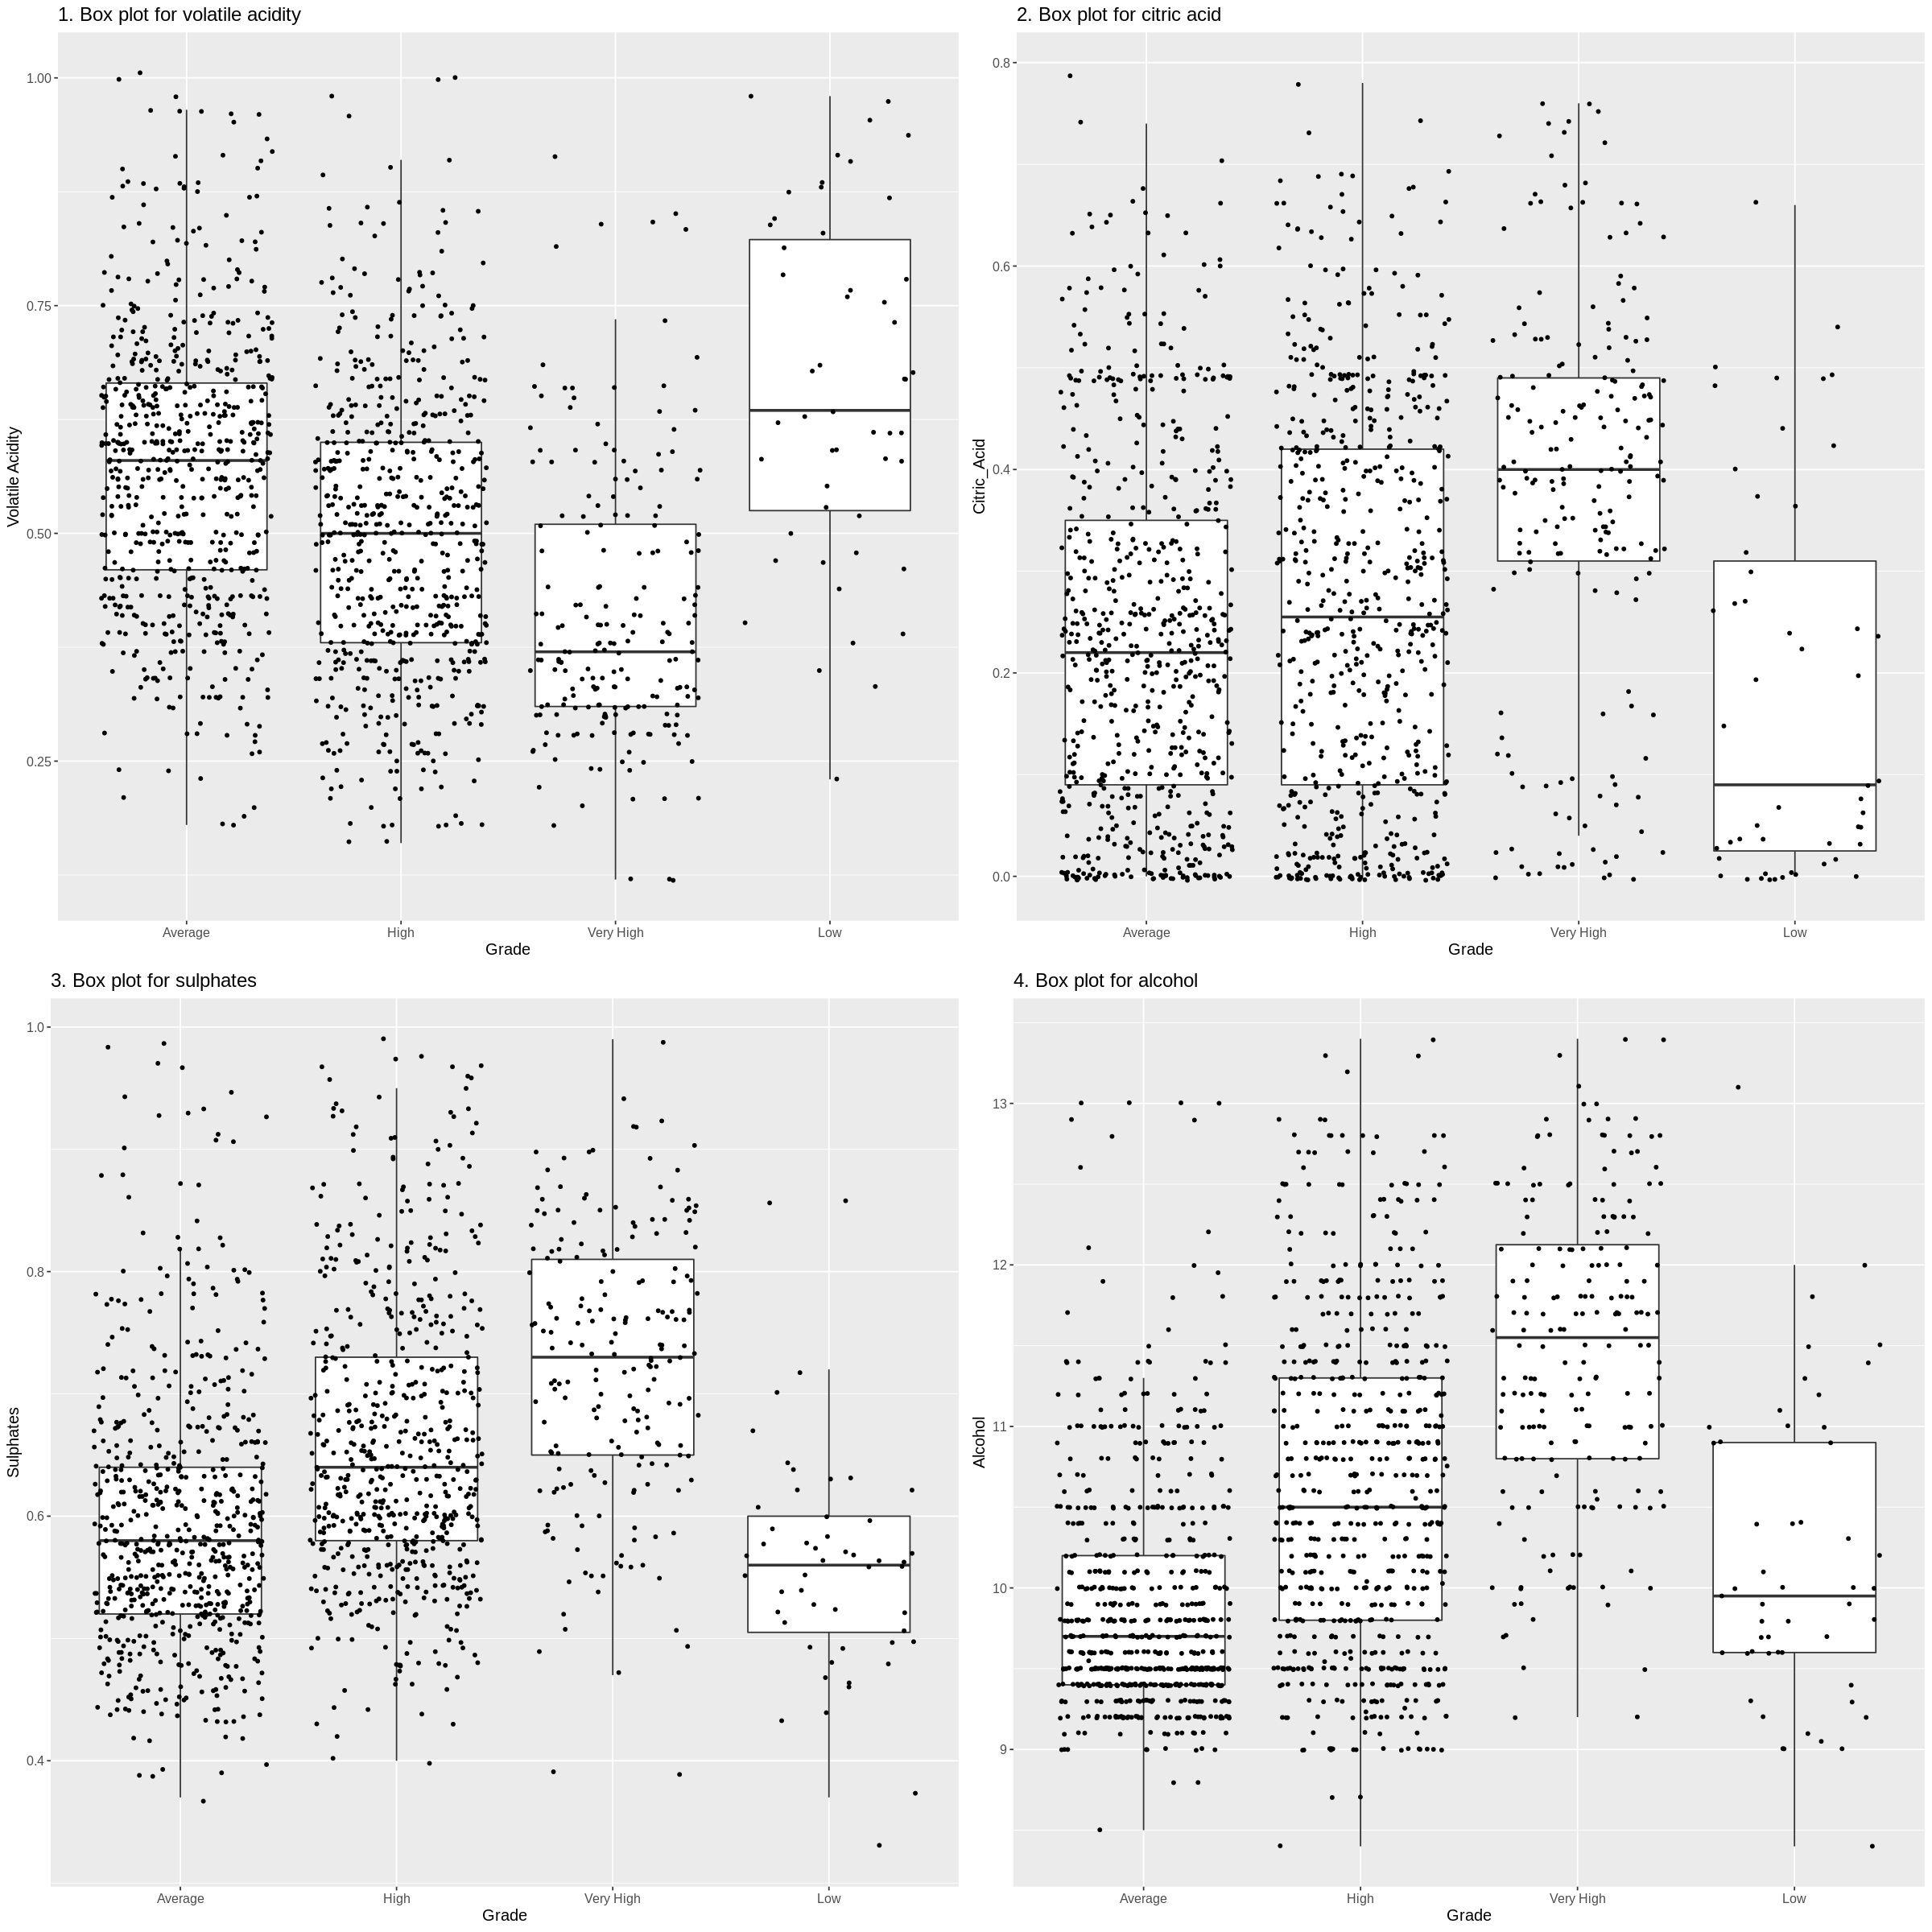

In [25]:
options(repr.plot.height = 20, repr.plot.width = 20)

#boxplot for volatile acidity
boxplot_volatile_acidity <- no_outliers_updated |>
                            ggplot(aes(x = Grade, y = volatile_acidity)) +
                            geom_boxplot(outlier.shape = NA) +
                            geom_jitter(size = 1) +
                            labs(x = "Grade", y = "Volatile Acidity") +
                            theme(text = element_text(size = 12)) +
                            ggtitle("1. Box plot for volatile acidity")

#boxplot for citric acid
boxplot_citric_acid <- no_outliers_updated |>
                       ggplot(aes(x = Grade, y = citric_acid)) +
                       geom_boxplot(outlier.shape = NA) +
                       geom_jitter(size = 1) +
                       labs(x = "Grade", y = "Citric_Acid") +
                       theme(text = element_text(size = 12)) +
                       ggtitle("2. Box plot for citric acid")

#boxplot for sulphates
boxplot_sulphates <- no_outliers_updated |>
                     ggplot(aes(x = Grade, y = sulphates)) +
                     geom_boxplot(outlier.shape = NA) +
                     geom_jitter(size = 1) +
                     labs(x = "Grade", y = "Sulphates") +
                     theme(text = element_text(size = 12)) +
                     ggtitle("3. Box plot for sulphates")


#boxplot for alcohol
boxplot_alcohol <- no_outliers_updated |>
                   ggplot(aes(x = Grade, y = alcohol)) +
                   geom_boxplot(outlier.shape = NA) +
                   geom_jitter(size = 1) +
                   labs(x = "Grade", y = "Alcohol") +
                   theme(text = element_text(size = 12)) +
                   ggtitle("4. Box plot for alcohol")

grid.arrange(boxplot_volatile_acidity,boxplot_citric_acid, boxplot_sulphates,boxplot_alcohol, ncol = 2)

## Visualization Analysis
Let's now break down the relation between our 4 predictor variables and the Grade of the wine. 
1. For Volatile Acidity:
* As the acidity increases, we can see the Grade goes from Very High to Low and so quality decreases. 

2. For Citric Acid:
* As the citric acid increases, we can see the Grade goes from Low to Very high and so quality increases. 

3. For Sulphates:
* As the sulphates increases, we can see the Grade goes from Low to Very high and so quality increases. 

4. For Alcohol:
* As the alcohol increases, we can see the Grade goes from Low to Very high and so quality increases. 

We can therefore conclude that all variables except volatile acidity, are directly proportional to the quality of wine. 

## Expected outcomes and significance:

### Summary of what we found

To begin, we determined the physiochemical properties of red wine that have the greatest correlation to its quality: citric acid, alcohol, volatile acidity, and sulphates. Using these predictors, we attempted to create a model that could predict the grade, or quality, of wine. The result of this produced a model with an accuracy of 60%. This result is not high enough to indicate a significant relationship between physicochemical properties and grade, however the existing correlation can still be considered.  

### What do you expect to find?

Chemical properties of a substance can have an effect on taste. For example, a sour taste in foods is influenced by pH and acids present (Da Conceicao Neta, et al., 2007). Knowing this, we expected the accuracy to be slightly higher because we expected physicochemical properties to impact taste, and thus also affect quality as taste is a factor in the human aspect of wine tasting.

 ### What impact could such findings have?

The findings of our project aids in wine production where wineries can explore specific physicochemical properties of wine that play a larger role in affecting the quality of the wine produced. Thus, wineries can refine their production process to produce better quality wines. 

### What future questions could this lead to?

Future studies should explore whether other types of wines share the same dependence of citric acid, alcohol, volatile acid and sulphates on the quality of wine. Secondly, studies can address the influence aging of wine plays in the correlation of citric acid, alcohol, volatile acid and sulphates on the quality of wine. 

## Bibliography

* Charters, S., & Pettigrew, S. (2007). The dimensions of wine quality. Food Quality and Preference, 18(7), 997-1007. https://doi.org/10.1016/j.foodqual.2007.04.003

*  Da Conceicao Neta, E. R., Johanningsmeier, S. D., Drake, M. A., & McFeeters, R. F. (2007). A chemical basis for sour taste perception of acid solutions and fresh-pack dill pickles. Journal of food science, 72(6), S352–S359. https://doi.org/10.1111/j.1750-3841.2007.00400.x
 
* P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.



